Advertencia: los puntos y datos tienen limitaciones de Uso y Distribución

Proyecto para la predicción de casos de rabia de origen animal


# Objetivo

En este notebook se desea realizar una descripción y preedicción haciendo uso de modelos de series de tiempo para la predicción de los casos de rabia en colombia

# Introducción
La rabia de origen silvestre representa una amenaza significativa para Colombia, impactando no solo la salud pública y animal, sino también la economía del país. Esta enfermedad zoonótica, transmitida principalmente por la fauna silvestre, afecta a diversas especies y plantea riesgos considerables para las actividades ganaderas y agrícolas. La presencia de rabia en la fauna silvestre limita las oportunidades de exportación de productos agrícolas y pecuarios, además de influir negativamente en el precio internacional de estos productos. La disminución en la calidad y cantidad de exportaciones, junto con el potencial aumento en los costos de producción y manejo, refleja la necesidad urgente de estrategias efectivas para controlar y erradicar esta enfermedad. La identificación de las zonas más afectadas y la implementación de medidas preventivas son cruciales para mitigar el impacto económico y proteger los recursos agrícolas y ganaderos del país.



In [ ]:
pip install prophet


In [ ]:
!pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 12.8 MB/s eta 0:00:00


In [ ]:
pip install folium geopandas


In [ ]:
pip install geopandas matplotlib


In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd
from sklearn.preprocessing import StandardScaler
import folium
from shapely.geometry import Point
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from IPython.display import display, HTML
from sklearn.cluster import DBSCAN

Se cargan los datos de datos de raboa 2013 a 2024 del ica que se encuentran georreferenciados

In [ ]:
df=pd.read_csv('talento_rabia_IA_rabia2013_2024.csv',delimiter=";")

In [ ]:
df

OBJECTID       sp            x            y  \
0            1  rb13_23  609530,7816  679421,3175   
1            2  rb13_23  707700,3931  747037,3484   
2            3  rb13_23  683695,2258  552580,1064   
3            4  rb13_23  685217,8353   550574,426   
4            5  rb13_23  684589,0939  550235,9399   
...        ...      ...          ...          ...   
1216      1217  rb13_23  1066999,433  1620620,831   
1217      1218  rb13_23  1080222,573  1637679,948   
1218      1219  rb13_23  1065446,032  1648407,558   
1219      1220  rb13_23  1147067,762  1694550,373   
1220      1221  rb13_23  1147065,666  1694628,589   

      ExtractByMask_OutRaster_dis_agua  ExtractByMask_OutRaster_dis_bos  \
0                               6000.0                           1000.0   
1                               5830.0                           2915.0   
2                               6184.0                            500.0   
3                               4000.0                            500.0   
4                               3535.0                           1000.0   
...                                ...                              ...   
1216                           10307.0                           6082.0   
1217                           10688.0                           7211.0   
1218                               NaN                              NaN   
1219                            9433.0                           1581.0   
1220                            9433.0                           1581.0   

     ExtractByMask_OutRaster_dis_palma  ExtractByMask_OutRaster_elevacion  
0                          104519,1016                             1925.0  
1                          148030,4063                             1879.0  
2                          149493,2969                              492.0  
3                          149387,0938                              473.0  
4                          150083,2969                              472.0  
...                                ...                                ...  
1216                       6363,960938                               85.0  
1217                       6184,658203                              123.0  
1218                               NaN                                NaN  
1219                       9192,387695                              268.0  
1220                       9192,387695                              269.0  

[1221 rows x 8 columns]

In [ ]:
# Remover las comas y convertir las columnas a tipo float
df['x'] = df['x'].str.replace(',', '.').astype(float)
df['y'] = df['y'].str.replace(',', '.').astype(float)


In [ ]:
df['ExtractByMask_OutRaster_dis_palma']= df['ExtractByMask_OutRaster_dis_palma'].str.replace(',', '.').astype(float)

Promt = ayudame a importar puntos en coordenadas 3116

In [ ]:

# Convertir las coordenadas en puntos geométricos
geometry = [Point(xy) for xy in zip(df['x'], df['y'])]

# Crear un GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Asignar el CRS EPSG:3116
gdf.set_crs(epsg=3116, inplace=True)


OBJECTID       sp             x             y  \
0            1  rb13_23  6.095308e+05  6.794213e+05   
1            2  rb13_23  7.077004e+05  7.470373e+05   
2            3  rb13_23  6.836952e+05  5.525801e+05   
3            4  rb13_23  6.852178e+05  5.505744e+05   
4            5  rb13_23  6.845891e+05  5.502359e+05   
...        ...      ...           ...           ...   
1216      1217  rb13_23  1.066999e+06  1.620621e+06   
1217      1218  rb13_23  1.080223e+06  1.637680e+06   
1218      1219  rb13_23  1.065446e+06  1.648408e+06   
1219      1220  rb13_23  1.147068e+06  1.694550e+06   
1220      1221  rb13_23  1.147066e+06  1.694629e+06   

      ExtractByMask_OutRaster_dis_agua  ExtractByMask_OutRaster_dis_bos  \
0                               6000.0                           1000.0   
1                               5830.0                           2915.0   
2                               6184.0                            500.0   
3                               4000.0                            500.0   
4                               3535.0                           1000.0   
...                                ...                              ...   
1216                           10307.0                           6082.0   
1217                           10688.0                           7211.0   
1218                               NaN                              NaN   
1219                            9433.0                           1581.0   
1220                            9433.0                           1581.0   

      ExtractByMask_OutRaster_dis_palma  ExtractByMask_OutRaster_elevacion  \
0                         104519.101600                             1925.0   
1                         148030.406300                             1879.0   
2                         149493.296900                              492.0   
3                         149387.093800                              473.0   
4                         150083.296900                              472.0   
...                                 ...                                ...   
1216                        6363.960938                               85.0   
1217                        6184.658203                              123.0   
1218                                NaN                                NaN   
1219                        9192.387695                              268.0   
1220                        9192.387695                              269.0   

                             geometry  
0       POINT (609530.782 679421.318)  
1       POINT (707700.393 747037.348)  
2       POINT (683695.226 552580.106)  
3       POINT (685217.835 550574.426)  
4       POINT (684589.094 550235.940)  
...                               ...  
1216  POINT (1066999.433 1620620.831)  
1217  POINT (1080222.573 1637679.948)  
1218  POINT (1065446.032 1648407.558)  
1219  POINT (1147067.762 1694550.373)  
1220  POINT (1147065.666 1694628.589)  

[1221 rows x 9 columns]

# Resumen datos
Se identifican 1221 datos reportados de rabia a nivel nacional

# Parte I Clustering
En esta primera parte vamos a realizar una clasificación de los puntos de rabia, teniendo en cuenta la ubicación x, y, distancia a cuerpos de agua (Ideam, 2022), distancia a bosques (Ideanm, 2016), distancia a cultivos de palma de aceite (Ideam, 2018) y elevación (Igac, 2012) la información se encuentra en metros.

Vamos a visualizar los datos

Promt= ayudame a mejorar estas lineas cambia el formato de coordenadas a 4326

In [ ]:
import geopandas as gpd
import folium
from shapely.geometry import Point


# Convertir las coordenadas en puntos geométricos
geometry = [Point(xy) for xy in zip(df['x'], df['y'])]

# Crear un GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Asignar el CRS EPSG:3116
gdf.set_crs(epsg=3116, inplace=True)

# Convertir a WGS84 para usarlo en Folium (EPSG:4326)
gdf = gdf.to_crs(epsg=4326)

# Crear un mapa centrado en las coordenadas promedio
center = [gdf.geometry.y.mean(), gdf.geometry.x.mean()]
m = folium.Map(location=center, zoom_start=6)

# Agregar los puntos al mapa
for _, row in gdf.iterrows():
    folium.Marker([row.geometry.y, row.geometry.x]).add_to(m)

# Mostrar el mapa
m


In [ ]:
df = df.dropna()

Elimiando los campos en donde no reportamos información vamos a eliminarlos, de esta manera nos quedamos con 998 datos

In [ ]:
df

OBJECTID       sp             x             y  \
0            1  rb13_23  6.095308e+05  6.794213e+05   
1            2  rb13_23  7.077004e+05  7.470373e+05   
2            3  rb13_23  6.836952e+05  5.525801e+05   
3            4  rb13_23  6.852178e+05  5.505744e+05   
4            5  rb13_23  6.845891e+05  5.502359e+05   
...        ...      ...           ...           ...   
1215      1216  rb13_23  1.103115e+06  1.627319e+06   
1216      1217  rb13_23  1.066999e+06  1.620621e+06   
1217      1218  rb13_23  1.080223e+06  1.637680e+06   
1219      1220  rb13_23  1.147068e+06  1.694550e+06   
1220      1221  rb13_23  1.147066e+06  1.694629e+06   

      ExtractByMask_OutRaster_dis_agua  ExtractByMask_OutRaster_dis_bos  \
0                               6000.0                           1000.0   
1                               5830.0                           2915.0   
2                               6184.0                            500.0   
3                               4000.0                            500.0   
4                               3535.0                           1000.0   
...                                ...                              ...   
1215                           12539.0                           1000.0   
1216                           10307.0                           6082.0   
1217                           10688.0                           7211.0   
1219                            9433.0                           1581.0   
1220                            9433.0                           1581.0   

      ExtractByMask_OutRaster_dis_palma  ExtractByMask_OutRaster_elevacion  
0                         104519.101600                             1925.0  
1                         148030.406300                             1879.0  
2                         149493.296900                              492.0  
3                         149387.093800                              473.0  
4                         150083.296900                              472.0  
...                                 ...                                ...  
1215                       12619.429690                              383.0  
1216                        6363.960938                               85.0  
1217                        6184.658203                              123.0  
1219                        9192.387695                              268.0  
1220                        9192.387695                              269.0  

[998 rows x 8 columns]

In [ ]:
# Seleccionar solo las columnas necesarias para la clasificación
columns_to_cluster = ['x', 'y', 'ExtractByMask_OutRaster_dis_agua', 'ExtractByMask_OutRaster_dis_bos', 'ExtractByMask_OutRaster_dis_palma','ExtractByMask_OutRaster_elevacion']

Para el análisis de datos es importante realizar una normalizacion de la información

In [ ]:
# Normalizar los datos
scaler = StandardScaler()
data_normalized = scaler.fit_transform(df[columns_to_cluster])

In [ ]:
data_normalized

array([[-2.01332299, -2.25795803, -0.63627031, -0.56960733,  1.11154513,
         2.80100291],
       [-1.52950193, -2.02712582, -0.64787338,  0.14252014,  1.94086123,
         2.71776892],
       [-1.64780947, -2.69097718, -0.6237117 , -0.75554139,  1.96874361,
         0.20808316],
       ...,
       [ 0.30644374,  1.01341048, -0.31629864,  1.74006562, -0.7626882 ,
        -0.4595982 ],
       [ 0.63588489,  1.20755861, -0.40195659, -0.35355195, -0.70536152,
        -0.19723018],
       [ 0.63587456,  1.20782563, -0.40195659, -0.35355195, -0.70536152,
        -0.19542075]])

In [ ]:
# Excluir columnas específicas
df_filtered = df.drop(columns=['OBJECTID', 'sp','x','y'])

In [ ]:
# Calcular la matriz de correlación con las columnas filtradas
correlation_matrix = df_filtered.corr()

Realizamos una matriz de correlación para identificar como se encuentran relacionadas las variables

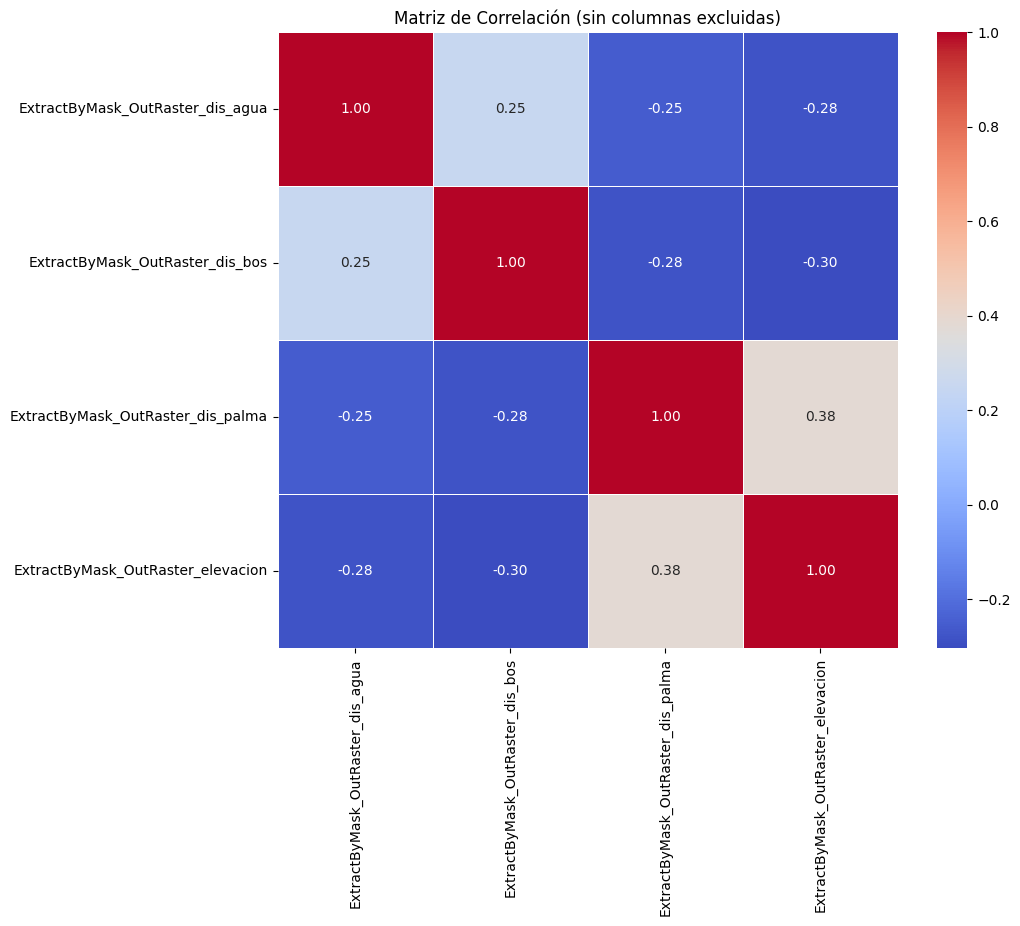

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 8))

# Crear un heatmap de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Mostrar el gráfico
plt.title('Matriz de Correlación (sin columnas excluidas)')
plt.show()


En la matriz de correlación podemos identificar la baja correlación de las variables que han sido identificadas como relacionadas con la rabia de origen natural

Como primer paso vamosa realizar un clustering teniendo en cuenta las variables anteriormente descritas

Promt= genera una comparación con de k-means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

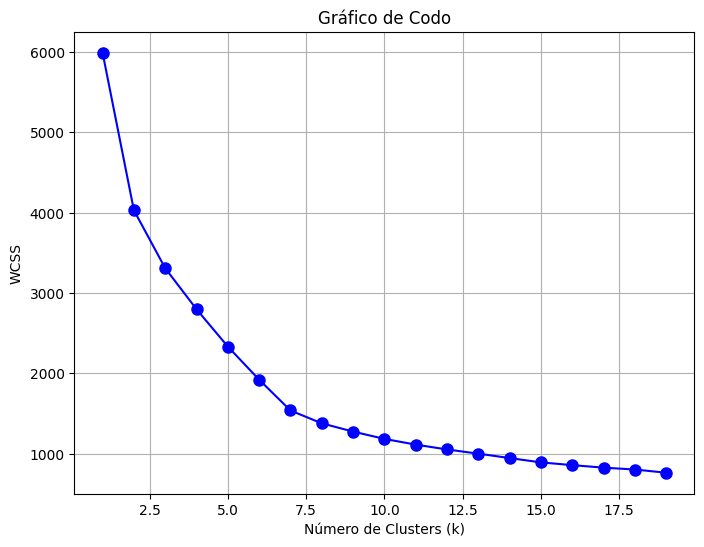

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Definir el rango de valores para k
k_values = range(1, 20)
wcss = []

# Calcular WCSS para cada valor de k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_normalized)  # Usa los datos normalizados
    wcss.append(kmeans.inertia_)  # inertia_ es el WCSS

# Generar el gráfico de codo
plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss, 'bo-', markersize=8)
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS')
plt.title('Gráfico de Codo')
plt.grid(True)
plt.show()


A partir del gráfico de codo vamos a tomar 11 variables, se toman los modelos de kmeans, kmedoids y dbscan para identificar los diferentes clustering, este ejercicio es importante ya que nos ayuda a caracterizar como los factores se distribuyen en el espacio

In [ ]:
from sklearn.cluster import KMeans

# Definir el número de clusters
n_clusters = 11

# Aplicar K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
df['kmeans_labels'] = kmeans.fit_predict(data_normalized)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-20-5ccf59eecdde>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kmeans_labels'] = kmeans.fit_predict(data_normalized)


In [ ]:
from sklearn_extra.cluster import KMedoids

# Aplicar K-Medoids
kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)
df['kmedoids_labels'] = kmedoids.fit_predict(data_normalized)

<ipython-input-21-d80a0899beb0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kmedoids_labels'] = kmedoids.fit_predict(data_normalized)


In [ ]:
import pandas as pd
import geopandas as gpd
import folium
from shapely.geometry import Point
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from IPython.display import display, HTML

In [ ]:
df

OBJECTID       sp             x             y  \
0            1  rb13_23  6.095308e+05  6.794213e+05   
1            2  rb13_23  7.077004e+05  7.470373e+05   
2            3  rb13_23  6.836952e+05  5.525801e+05   
3            4  rb13_23  6.852178e+05  5.505744e+05   
4            5  rb13_23  6.845891e+05  5.502359e+05   
...        ...      ...           ...           ...   
1215      1216  rb13_23  1.103115e+06  1.627319e+06   
1216      1217  rb13_23  1.066999e+06  1.620621e+06   
1217      1218  rb13_23  1.080223e+06  1.637680e+06   
1219      1220  rb13_23  1.147068e+06  1.694550e+06   
1220      1221  rb13_23  1.147066e+06  1.694629e+06   

      ExtractByMask_OutRaster_dis_agua  ExtractByMask_OutRaster_dis_bos  \
0                               6000.0                           1000.0   
1                               5830.0                           2915.0   
2                               6184.0                            500.0   
3                               4000.0                            500.0   
4                               3535.0                           1000.0   
...                                ...                              ...   
1215                           12539.0                           1000.0   
1216                           10307.0                           6082.0   
1217                           10688.0                           7211.0   
1219                            9433.0                           1581.0   
1220                            9433.0                           1581.0   

      ExtractByMask_OutRaster_dis_palma  ExtractByMask_OutRaster_elevacion  \
0                         104519.101600                             1925.0   
1                         148030.406300                             1879.0   
2                         149493.296900                              492.0   
3                         149387.093800                              473.0   
4                         150083.296900                              472.0   
...                                 ...                                ...   
1215                       12619.429690                              383.0   
1216                        6363.960938                               85.0   
1217                        6184.658203                              123.0   
1219                        9192.387695                              268.0   
1220                        9192.387695                              269.0   

      kmeans_labels  kmedoids_labels  
0                 6               10  
1                 6               10  
2                 1               10  
3                 1               10  
4                 1               10  
...             ...              ...  
1215              7                4  
1216              9                1  
1217              9                1  
1219              7                4  
1220              7                4  

[998 rows x 10 columns]

Promt= Ayudame a generar un mapa comparando ambos metodos k-means y k-medoids

In [ ]:
# Convertir las coordenadas en puntos geométricos
df['geometry'] = [Point(xy) for xy in zip(df['x'], df['y'])]

# Crear un GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=df['geometry'])

# Asignar el CRS EPSG:3116
gdf.set_crs(epsg=3116, inplace=True)

# Convertir a WGS84 para usarlo en Folium (EPSG:4326)
gdf = gdf.to_crs(epsg=4326)

# Crear el primer mapa (K-Means)
m1 = folium.Map(location=[4.7110, -74.0721], zoom_start=6)



colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow', 'cyan', 'magenta', 'brown', 'black', 'pink']

# Agregar los puntos clasificados por K-Means
for _, row in gdf.iterrows():
    cluster_label = row['kmeans_labels']
    color = colors[cluster_label]
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6
    ).add_to(m1)




# Crear el segundo mapa (K-Medoids)
m2 = folium.Map(location=[4.7110, -74.0721], zoom_start=6)

import folium

# Definir un mapa centrado en Colombia
m2 = folium.Map(location=[4.7110, -74.0721], zoom_start=6)

# Definir los colores para los 5 grupos
colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow', 'cyan', 'magenta', 'brown', 'black', 'pink']

# Agregar los puntos clasificados por K-Medoids
for _, row in gdf.iterrows():
    cluster_label = row['kmedoids_labels']
    color = colors[cluster_label]
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=10,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6
    ).add_to(m2)



<ipython-input-25-ac52eacce4e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['geometry'] = [Point(xy) for xy in zip(df['x'], df['y'])]


Ademas vamos a usar dbscan que es una metodologia que espacialmente nos ayuda a ubicar datos atipicos para este ejericio unicamente vamos a usar los parametros de 0.5 de eps y un minimo de muestras de 10, ademas que de negro se pueden identificar los valores que son considerados atipicos

Promt= Corrige esrás lineas

In [ ]:

# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=10)
df['dbscan_labels'] = dbscan.fit_predict(data_normalized)

# Convertir las coordenadas en puntos geométricos
df['geometry'] = [Point(xy) for xy in zip(df['x'], df['y'])]

# Crear un GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=df['geometry'])

# Asignar el CRS EPSG:3116
gdf.set_crs(epsg=3116, inplace=True)

# Convertir a WGS84 para usarlo en Folium (EPSG:4326)
gdf = gdf.to_crs(epsg=4326)

# Crear el mapa para DBSCAN
m_dbscan = folium.Map(location=[4.7110, -74.0721], zoom_start=6)




<ipython-input-26-6e1e5418d938>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dbscan_labels'] = dbscan.fit_predict(data_normalized)
<ipython-input-26-6e1e5418d938>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['geometry'] = [Point(xy) for xy in zip(df['x'], df['y'])]


In [ ]:
# Mostrar los dos mapas uno al lado del otro
display(HTML("<h3>K-Means vs K-Medoids Clustering</h3>"))
display(HTML("<div style='display: flex; justify-content: space-between;'>"
             "<div style='width: 49%;'>" + m1._repr_html_() + "</div>"
             "<div style='width: 49%;'>" + m2._repr_html_() + "</div>"
             "</div>"))

Podemos identificar áreas de zona fria y zonas de área cálida

In [ ]:
import folium

# Crear un GeoDataFrame con las coordenadas
gdf = gpd.GeoDataFrame(df, geometry=[Point(xy) for xy in zip(df['x'], df['y'])])

# Asignar el CRS EPSG:3116
gdf.set_crs(epsg=3116, inplace=True)

# Convertir a WGS84 para usarlo en Folium (EPSG:4326)
gdf = gdf.to_crs(epsg=4326)

# Crear el mapa centrado en Colombia
colombia_center = [4.7110, -74.0721]  # Coordenadas aproximadas de Bogotá
m = folium.Map(location=colombia_center, zoom_start=6)

# Definir colores para los clusters (los valores de DBSCAN pueden incluir -1 para ruido)
colors = ['blue', 'green', 'red', 'purple', 'orange', 'darkred', 'lightred', 'darkblue', 'darkgreen', 'darkpurple']

# Agregar los puntos clasificados por DBSCAN
for _, row in gdf.iterrows():
    cluster_label = row['dbscan_labels']
    color = colors[cluster_label % len(colors)] if cluster_label != -1 else 'black'
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6
    ).add_to(m)

# Mostrar el mapa
m


Las ventajas que tiene dbscan sobre los otros modelos es la detección de datos atípicos. a diferencia de los otros modelos kmeans y kmedoids se realiza la agregación de los grupos también por su cercania espacial.

# Series temporales

In [ ]:
df2=pd.read_csv('Rabia_2.csv')

In [ ]:
print(df2.head())

   Aos (FECHA INICIO ENFERMEDAD) Meses (FECHA INICIO ENFERMEDAD)  Total
0                           2010                             ene     16
1                           2010                             feb     11
2                           2010                             mar     10
3                           2010                             abr     15
4                           2010                             may     12


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Aos (FECHA INICIO ENFERMEDAD)    120 non-null    int64 
 1   Meses (FECHA INICIO ENFERMEDAD)  120 non-null    object
 2   Total                            120 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.9+ KB


Prot = Corrige el formato de entrada

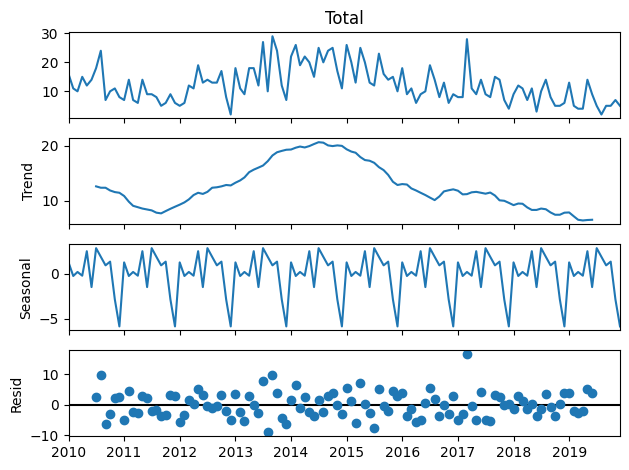

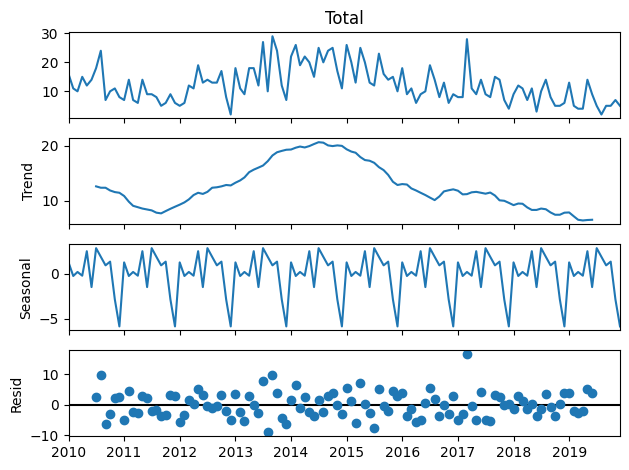

In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# Crear un diccionario para mapear los nombres de los meses en español a números
meses_espanol = {
    'ene': '01', 'feb': '02', 'mar': '03', 'abr': '04', 'may': '05',
    'jun': '06', 'jul': '07', 'ago': '08', 'sep': '09', 'oct': '10',
    'nov': '11', 'dic': '12'
}

# Reemplazar los nombres de los meses por los números correspondientes
df2['Meses (FECHA INICIO ENFERMEDAD)'] = df2['Meses (FECHA INICIO ENFERMEDAD)'].map(meses_espanol)

# Crear la columna de fecha combinando año y mes
df2['Fecha'] = pd.to_datetime(df2['Aos (FECHA INICIO ENFERMEDAD)'].astype(str) + '-' + df2['Meses (FECHA INICIO ENFERMEDAD)'], format='%Y-%m')

# Configurar la columna de fecha como índice
df2.set_index('Fecha', inplace=True)

# Convertir la columna 'Total' en una serie temporal
ts = df2['Total']

# Realizar la descomposición estacional
decomposition = seasonal_decompose(ts, model='additive', period=12)

# Extraer la tendencia, estacionalidad y residuales
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Si deseas, puedes visualizar los componentes
decomposition.plot()



En las grafcas podemos notar cierta estacionalidad de los datos, esto se puede deber a las condiciones medioambientales o a las condiciones del levantamiento de los reportes o a la disponibilidad de personal

In [ ]:
ts


Fecha
2010-01-01    16
2010-02-01    11
2010-03-01    10
2010-04-01    15
2010-05-01    12
              ..
2019-08-01     2
2019-09-01     5
2019-10-01     5
2019-11-01     7
2019-12-01     5
Name: Total, Length: 120, dtype: int64

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from prophet import Prophet

# Modelo ARIMA

In [ ]:
# Dividir los datos en entrenamiento y prueba
train_size = int(len(ts) * 0.8)  # Usar el 80% de los datos para entrenamiento
train_data, test_data = ts[:train_size], ts[train_size:]


# Ajustar el modelo (ejemplo: ARIMA(1,1,1))
model = ARIMA(train_data, order=(1,1,1))
model_fit = model.fit()

fc = model_fit.forecast(len(test_data))


# Evaluate the model (example: RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test_data, fc))
print('RMSE: %.2f' % rmse)


RMSE: 4.12


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


# Modelo exponencial

In [ ]:
# Ajustar el modelo (ejemplo: tendencia aditiva y estacionalidad aditiva)
model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()

# Predecir
fc = model_fit.forecast(len(test_data))

# Evaluar el modelo (ejemplo: RMSE)
rmse = np.sqrt(mean_squared_error(test_data, fc))
print('RMSE: %.2f' % rmse)


RMSE: 5.14


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
print(train_data)

Fecha
2010-01-01    16
2010-02-01    11
2010-03-01    10
2010-04-01    15
2010-05-01    12
              ..
2017-08-01     8
2017-09-01    15
2017-10-01    14
2017-11-01     7
2017-12-01     4
Name: Total, Length: 96, dtype: int64


# Sarimax

In [ ]:
model = SARIMAX(train_data, order=(1,1,1), seasonal_order=(1,1,1,12))
model_fit = model.fit(disp=False)

# Predecir
fc = model_fit.forecast(len(test_data))

# Evaluar el modelo (ejemplo: RMSE)
rmse = np.sqrt(mean_squared_error(test_data, fc))
print('RMSE: %.2f' % rmse)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


RMSE: 4.74


# Modelo redes neuronales LSTM

Promt= Genera un codigo que sirva para evaluar los hiperparametros de un modelo lstm

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Crear secuencias para entrenamiento y prueba
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Parámetros
seq_length = 10  # Longitud de la secuencia
scaler = MinMaxScaler(feature_range=(0, 1))

# Normalizar los datos
ts_normalized = scaler.fit_transform(ts.values.reshape(-1, 1))


# Crear secuencias
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Reshape para LSTM [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)



X_train shape: (86, 10, 1)
y_train shape: (86,)
X_test shape: (14, 10, 1)
y_test shape: (14,)


<ipython-input-52-39ac5fd62ec6>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y.append(data[i + seq_length])


In [ ]:
pip install keras-tuner


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import kerastuner as kt
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# Definir la función de modelo para KerasTuner
def build_model(hp):
    model = Sequential()

    # Agregar la capa LSTM con hiperparámetros ajustables
    model.add(LSTM(
        units=hp.Int('units', min_value=10, max_value=100, step=10),
        activation=hp.Choice('activation', values=['relu', 'tanh']),
        input_shape=(X_train.shape[1], 1),
        return_sequences=True
    ))

    # Agregar Dropout
    model.add(Dropout(hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1)))

    model.add(LSTM(
        units=hp.Int('units_2', min_value=10, max_value=100, step=10),
        activation=hp.Choice('activation_2', values=['relu', 'tanh'])
    ))

    # Agregar Dropout
    model.add(Dropout(hp.Float('dropout_rate_2', min_value=0.0, max_value=0.5, step=0.1)))

    model.add(Dense(1))

    # Compilar el modelo con hiperparámetros ajustables
    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
        loss='mean_squared_error'
    )

    return model

# Crear el objeto KerasTuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=50,  # Número de combinaciones de hiperparámetros a probar
    executions_per_trial=1,
    directory='my_dir',
    project_name='intro_to_kt'
)

# Realizar la búsqueda de hiperparámetros
tuner.search(X_train, y_train, epochs=50, batch_size=1, validation_data=(X_test, y_test))

# Obtener el mejor modelo
best_model = tuner.get_best_models(num_models=1)[0]





Trial 50 Complete [00h 01m 03s]
val_loss: 8.630143165588379

Best val_loss So Far: 8.630143165588379
Total elapsed time: 00h 52m 59s


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step - loss: 8.6301
Pérdida en el conjunto de prueba: 8.630144119262695
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


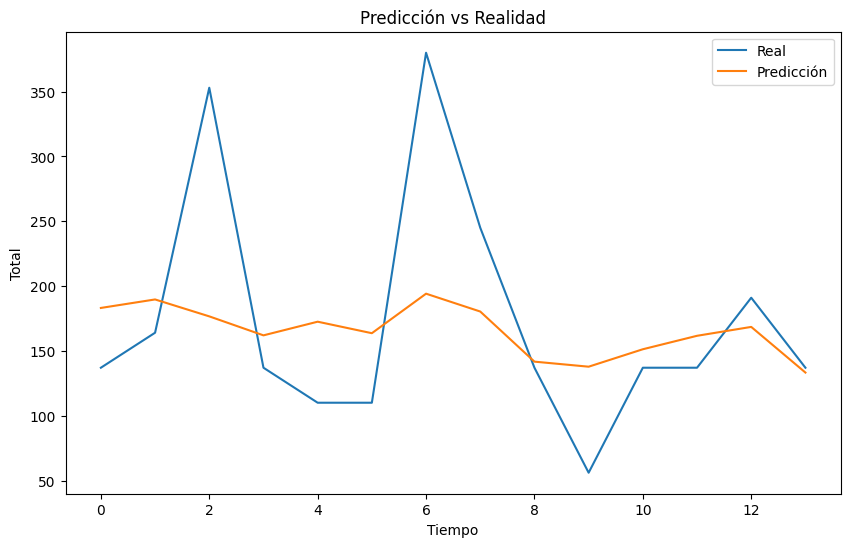

In [ ]:
# Evaluar el mejor modelo
loss = best_model.evaluate(X_test, y_test)
print(f'Pérdida en el conjunto de prueba: {loss}')

# Hacer predicciones con el mejor modelo
y_pred = best_model.predict(X_test)

# Visualizar las predicciones
# Deshacer la normalización
y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred_unscaled = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()

plt.figure(figsize=(10, 6))
plt.plot(y_test_unscaled, label='Real')
plt.plot(y_pred_unscaled, label='Predicción')
plt.xlabel('Tiempo')
plt.ylabel('Total')
plt.title('Predicción vs Realidad')
plt.legend()
plt.show()

In [ ]:
# Guardar el mejor modelo en formato HDF5
best_model.save('best_lstm_model.h5')


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calcular las métricas de calidad
mse = mean_squared_error(y_test_unscaled, y_pred_unscaled)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_unscaled, y_pred_unscaled)
r2 = r2_score(y_test_unscaled, y_pred_unscaled)

print(f'Error Cuadrático Medio (MSE): {mse:.4f}')
print(f'Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}')



Error Cuadrático Medio (MSE): 6291.3750
Raíz del Error Cuadrático Medio (RMSE): 79.3182


In [ ]:
last_sequence = X_train[-1]  # Última secuencia de entrenamiento

# Dar forma a los datos de entrada para que se ajusten al modelo (batch_size, time_steps, features)
last_sequence = last_sequence.reshape((1, X_train.shape[1], 1))

# Hacer la predicción
predicted_value = best_model.predict(last_sequence)

# Invertir la escala si es necesario
predicted_value = scaler.inverse_transform(predicted_value)

print(f'Predicción para la próxima fecha: {predicted_value[0][0]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step
Predicción para la próxima fecha: 264.5200500488281


In [ ]:
y_test[-1]

5

# Configuración de hiperparametros modelo ARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

Mejor orden ARIMA: (0, 2, 2)
Mejor RMSE: 3.30


<function matplotlib.pyplot.legend(*args, **kwargs)>

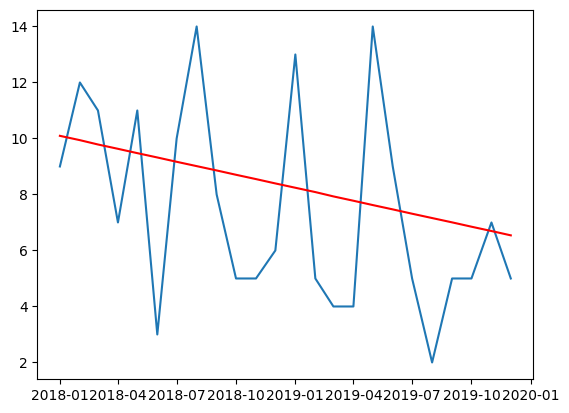

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import itertools

# Dividir los datos en entrenamiento y prueba
train_size = int(len(ts) * 0.8)
train_data, test_data = ts[:train_size], ts[train_size:]

# Definir rangos para p, d, q
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

# Variables para almacenar los mejores valores
best_rmse = float("inf")
best_order = None
best_forecast = None

# Iterar sobre todas las combinaciones de (p, d, q)
for order in pdq:
    try:
        model = ARIMA(train_data, order=order)
        model_fit = model.fit()
        fc = model_fit.forecast(len(test_data))
        rmse = np.sqrt(mean_squared_error(test_data, fc))

        if rmse < best_rmse:
            best_rmse = rmse
            best_order = order
            best_forecast = fc
    except Exception as e:
        continue

# Imprimir el mejor resultado
print(f'Mejor orden ARIMA: {best_order}')
print(f'Mejor RMSE: {best_rmse:.2f}')

# Si deseas, puedes graficar el pronóstico del mejor modelo
import matplotlib.pyplot as plt

plt.plot(test_data.index, test_data, label='Datos reales')
plt.plot(test_data.index, best_forecast, color='red', label='Pronóstico')
plt.legend



In [ ]:
import pickle

# Suponiendo que 'model_fit' es el modelo ARIMA ajustado
model_fit.save('arima_model.pkl')


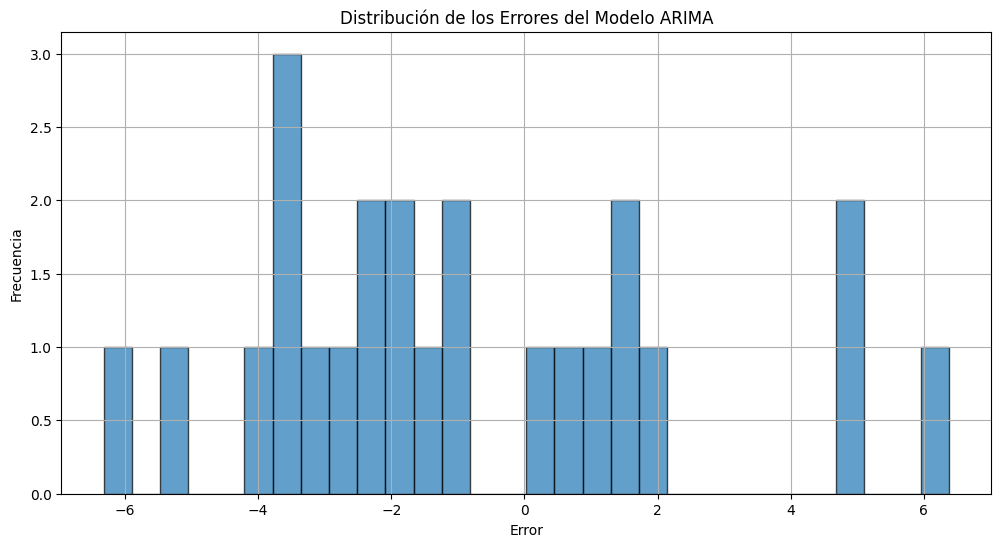

In [ ]:
# Calcular errores
errors = test_data - best_forecast

# Graficar distribución de los errores
plt.figure(figsize=(12, 6))
plt.hist(errors, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.title('Distribución de los Errores del Modelo ARIMA')
plt.grid(True)
plt.show()

# Resultados

Al realizar la comparación de los resultados se puede identificar que el modelo ARIMA tiene un mejor desempeño que los modelos de redes neuronales esto se puede relacionar con la falta de datos de los registos.  


# Parte II SDV

In [ ]:
# Crear un DataFrame con los datos normalizados
df_normalized = pd.DataFrame(data_normalized, columns=columns_to_cluster)

# Mostrar el DataFrame normalizado
df_normalized

x         y  ExtractByMask_OutRaster_dis_agua  \
0   -2.013323 -2.257958                         -0.636270   
1   -1.529502 -2.027126                         -0.647873   
2   -1.647809 -2.690977                         -0.623712   
3   -1.640305 -2.697824                         -0.772777   
4   -1.643404 -2.698980                         -0.804515   
..        ...       ...                               ...   
993  0.419265  0.978040                         -0.189962   
994  0.241275  0.955173                         -0.342303   
995  0.306444  1.013410                         -0.316299   
996  0.635885  1.207559                         -0.401957   
997  0.635875  1.207826                         -0.401957   

     ExtractByMask_OutRaster_dis_bos  ExtractByMask_OutRaster_dis_palma  \
0                          -0.569607                           1.111545   
1                           0.142520                           1.940861   
2                          -0.755541                           1.968744   
3                          -0.755541                           1.966719   
4                          -0.569607                           1.979989   
..                               ...                                ...   
993                        -0.569607                          -0.640043   
994                         1.320227                          -0.759271   
995                         1.740066                          -0.762688   
996                        -0.353552                          -0.705362   
997                        -0.353552                          -0.705362   

     ExtractByMask_OutRaster_elevacion  
0                             2.801003  
1                             2.717769  
2                             0.208083  
3                             0.173704  
4                             0.171894  
..                                 ...  
993                           0.010855  
994                          -0.528357  
995                          -0.459598  
996                          -0.197230  
997                          -0.195421  

[998 rows x 6 columns]

In [ ]:
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler


# Aplica SVD para reducir a 2 componentes
svd = TruncatedSVD(n_components=2)
df_svd = svd.fit_transform(df_normalized.drop(columns=['x','y']))

# Convierte el resultado en un DataFrame para facilitar su uso
df_svd = pd.DataFrame(df_svd, columns=['Componente_1', 'Componente_2'])

print(df_svd.head())


   Componente_1  Componente_2
0      2.648902      0.774796
1      2.697805      1.090401
2      1.783908      0.390592
3      1.832564      0.252591
4      1.763543      0.228562


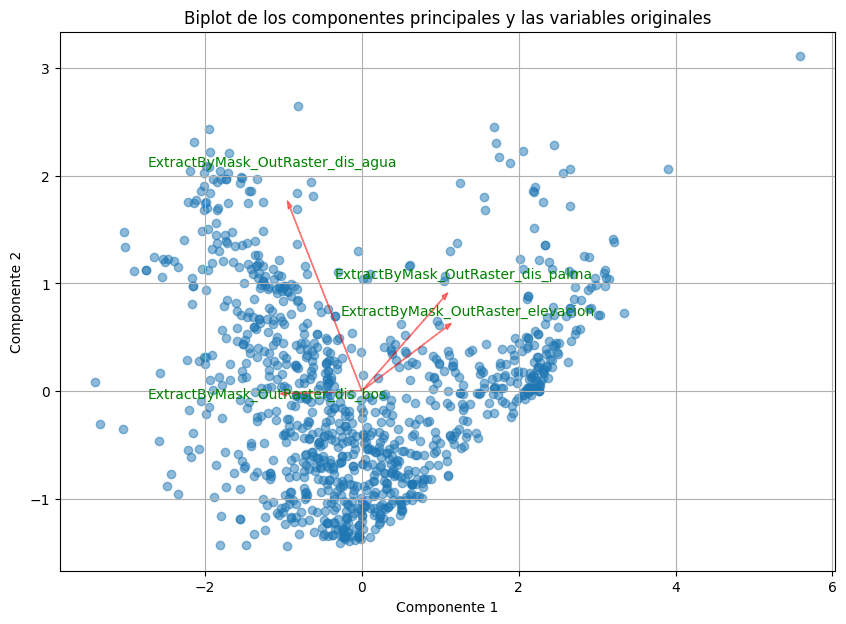

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Crear el gráfico de biplot
def biplot(svd, df_svd, df):
    plt.figure(figsize=(10, 7))

    # Gráfico de los datos proyectados en los componentes
    plt.scatter(df_svd['Componente_1'], df_svd['Componente_2'], alpha=0.5)

    # Gráfico de las variables originales como vectores
    feature_vectors = svd.components_.T
    arrow_size, text_pos = 2.0, 2.5

    for i, v in enumerate(feature_vectors):
        plt.arrow(0, 0, arrow_size * v[0], arrow_size * v[1],
                  color='r', alpha=0.5, head_width=0.05)
        plt.text(v[0] * text_pos, v[1] * text_pos, df.columns[i], color='g', ha='center', va='center')

    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.title('Biplot de los componentes principales y las variables originales')
    plt.grid()
    plt.show()

# Llama a la función biplot
biplot(svd, df_svd, df_normalized.drop(columns=['x','y']))


En el gráfico de los componentes principales 1 y 2, podemos identificar la influencia positiva en el componente 2, en relacion al componente 1 la relación positiva de distancia de palma y elevacion y la negativa de la distancia de agua y la distancia a bosques

# A seguir...

Se desea realizar la modelación de la probabilidad de la presentación de rabia silvestre de origen natural, mediante el uso de herramientas de machine learning, para esto es importante el paso de la generación o elaboración de los puntos de ausencia.

In [ ]:
import zipfile
import os

# Ruta del archivo ZIP
zip_file_path = 'datoa.zip'

# Directorio de destino donde se descomprimirá el contenido
extract_dir = 'datos/'

# Crear el directorio de destino si no existe
os.makedirs(extract_dir, exist_ok=True)


In [ ]:
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f'Archivo descomprimido en {extract_dir}')


Archivo descomprimido en datos/


In [ ]:
# Listar los archivos descomprimidos
extracted_files = os.listdir(extract_dir)
print('Archivos extraídos:')
for file in extracted_files:
    print(file)


Archivos extraídos:
dis_agua.asc.ovr
dis_palma.prj
dis_agua.asc.xml
dis_def.asc.aux.xml
dis_def.asc
dis_bos.asc
elevacion.prj
dis_bos.prj
elevacion.asc.xml
dis_agua.prj
dis_def.asc.xml
dis_bos.asc.xml
elevacion.asc.aux.xml
dis_palma.asc.xml
dis_bos.asc.aux.xml
dis_def.asc.ovr
dis_def.prj
dis_agua.asc
dis_palma.asc.aux.xml
elevacion.asc
dis_palma.asc
dis_bos.asc.ovr
dis_palma.asc.ovr
elevacion.asc.ovr
dis_agua.asc.aux.xml


In [ ]:
!pip install rasterio folium


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 42.0 MB/s eta 0:00:00


<ipython-input-10-7f6d1ec3f22e>:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


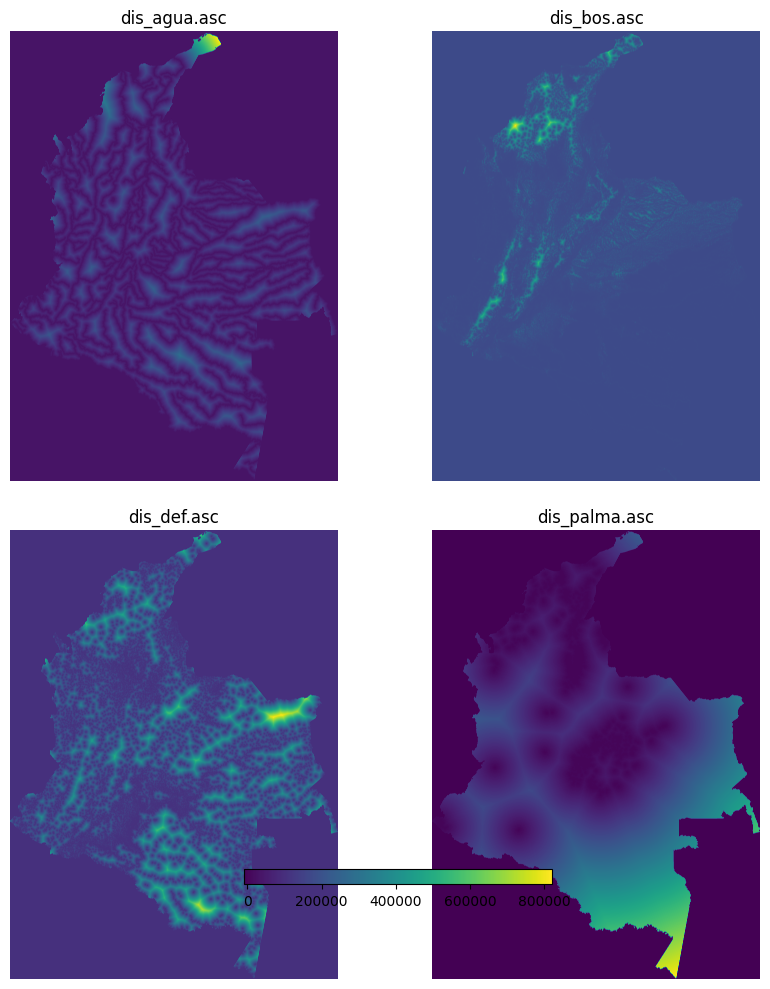

In [ ]:
import rasterio
import matplotlib.pyplot as

# Lista de rutas de las imágenes .asc
asc_files = ['datos/dis_agua.asc', 'datos/dis_bos.asc', 'datos/dis_def.asc', 'datos/dis_palma.asc']

# Configurar la figura para mostrar las imágenes
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Iterar sobre los archivos raster y los ejes para visualizarlos
for ax, asc_file in zip(axs.ravel(), asc_files):
    # Cargar el raster
    with rasterio.open(asc_file) as src:
        data = src.read(1)  # Leer el primer band
        img = ax.imshow(data, cmap='viridis')
        ax.set_title(asc_file.split('/')[-1])
        ax.axis('off')

# Añadir una barra de color
fig.colorbar(img, ax=axs, orientation='horizontal', fraction=0.02)

# Mostrar la figura
plt.tight_layout()
plt.show()


In [ ]:
df=pd.read_csv('talento_rabia_IA_rabia2013_2024.csv',delimiter=";")

In [ ]:
# Remover las comas y convertir las columnas a tipo float
df['x'] = df['x'].str.replace(',', '.').astype(float)
df['y'] = df['y'].str.replace(',', '.').astype(float)

In [ ]:
df

OBJECTID       sp             x             y  \
0            1  rb13_23  6.095308e+05  6.794213e+05   
1            2  rb13_23  7.077004e+05  7.470373e+05   
2            3  rb13_23  6.836952e+05  5.525801e+05   
3            4  rb13_23  6.852178e+05  5.505744e+05   
4            5  rb13_23  6.845891e+05  5.502359e+05   
...        ...      ...           ...           ...   
1216      1217  rb13_23  1.066999e+06  1.620621e+06   
1217      1218  rb13_23  1.080223e+06  1.637680e+06   
1218      1219  rb13_23  1.065446e+06  1.648408e+06   
1219      1220  rb13_23  1.147068e+06  1.694550e+06   
1220      1221  rb13_23  1.147066e+06  1.694629e+06   

      ExtractByMask_OutRaster_dis_agua  ExtractByMask_OutRaster_dis_bos  \
0                               6000.0                           1000.0   
1                               5830.0                           2915.0   
2                               6184.0                            500.0   
3                               4000.0                            500.0   
4                               3535.0                           1000.0   
...                                ...                              ...   
1216                           10307.0                           6082.0   
1217                           10688.0                           7211.0   
1218                               NaN                              NaN   
1219                            9433.0                           1581.0   
1220                            9433.0                           1581.0   

      ExtractByMask_OutRaster_dis_palma  ExtractByMask_OutRaster_elevacion  
0                         104519.101600                             1925.0  
1                         148030.406300                             1879.0  
2                         149493.296900                              492.0  
3                         149387.093800                              473.0  
4                         150083.296900                              472.0  
...                                 ...                                ...  
1216                        6363.960938                               85.0  
1217                        6184.658203                              123.0  
1218                                NaN                                NaN  
1219                        9192.387695                              268.0  
1220                        9192.387695                              269.0  

[1221 rows x 8 columns]

In [ ]:

# Convertir las coordenadas en puntos geométricos
geometry = [Point(xy) for xy in zip(df['x'], df['y'])]

# Crear un GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Asignar el CRS EPSG:3116
gdf.set_crs(epsg=3116, inplace=True)

OBJECTID       sp             x             y  \
0            1  rb13_23  6.095308e+05  6.794213e+05   
1            2  rb13_23  7.077004e+05  7.470373e+05   
2            3  rb13_23  6.836952e+05  5.525801e+05   
3            4  rb13_23  6.852178e+05  5.505744e+05   
4            5  rb13_23  6.845891e+05  5.502359e+05   
...        ...      ...           ...           ...   
1216      1217  rb13_23  1.066999e+06  1.620621e+06   
1217      1218  rb13_23  1.080223e+06  1.637680e+06   
1218      1219  rb13_23  1.065446e+06  1.648408e+06   
1219      1220  rb13_23  1.147068e+06  1.694550e+06   
1220      1221  rb13_23  1.147066e+06  1.694629e+06   

      ExtractByMask_OutRaster_dis_agua  ExtractByMask_OutRaster_dis_bos  \
0                               6000.0                           1000.0   
1                               5830.0                           2915.0   
2                               6184.0                            500.0   
3                               4000.0                            500.0   
4                               3535.0                           1000.0   
...                                ...                              ...   
1216                           10307.0                           6082.0   
1217                           10688.0                           7211.0   
1218                               NaN                              NaN   
1219                            9433.0                           1581.0   
1220                            9433.0                           1581.0   

      ExtractByMask_OutRaster_dis_palma  ExtractByMask_OutRaster_elevacion  \
0                         104519.101600                             1925.0   
1                         148030.406300                             1879.0   
2                         149493.296900                              492.0   
3                         149387.093800                              473.0   
4                         150083.296900                              472.0   
...                                 ...                                ...   
1216                        6363.960938                               85.0   
1217                        6184.658203                              123.0   
1218                                NaN                                NaN   
1219                        9192.387695                              268.0   
1220                        9192.387695                              269.0   

                             geometry  
0       POINT (609530.782 679421.318)  
1       POINT (707700.393 747037.348)  
2       POINT (683695.226 552580.106)  
3       POINT (685217.835 550574.426)  
4       POINT (684589.094 550235.940)  
...                               ...  
1216  POINT (1066999.433 1620620.831)  
1217  POINT (1080222.573 1637679.948)  
1218  POINT (1065446.032 1648407.558)  
1219  POINT (1147067.762 1694550.373)  
1220  POINT (1147065.666 1694628.589)  

[1221 rows x 9 columns]

In [ ]:
import rasterio
import geopandas as gpd
from shapely.geometry import Point
import numpy as np
import pandas as pd

# Ruta al archivo .asc
asc_file = 'datos/elevacion.asc'

# Cargar el archivo raster
with rasterio.open(asc_file) as src:
    # Leer el primer band (la única banda en un archivo .asc)
    data = src.read(1)

    # Identificar las coordenadas donde los valores no son -9999 (puntos válidos)
    valid_mask = data != -9999

    # Obtener las coordenadas en el sistema de referencia del raster (EPSG:3116)
    rows, cols = np.where(valid_mask)
    x_coords, y_coords = src.transform * (cols, rows)

# Crear un GeoDataFrame con los puntos válidos
valid_points = gpd.GeoDataFrame(geometry=[Point(x, y) for x, y in zip(x_coords, y_coords)], crs='EPSG:3116')

# Seleccionar un subconjunto aleatorio de puntos válidos como pseudo-ausencias
n_pseudo_absences = 100  # Puedes ajustar este valor
pseudo_absence_points = valid_points.sample(n=n_pseudo_absences, random_state=42)

# Asegurarse de que los puntos de pseudo-ausencia no coincidan con los puntos de presencia
pseudo_absence_points = pseudo_absence_points[~pseudo_absence_points.geometry.isin(gdf.geometry)]

# Crear un DataFrame combinando puntos de presencia y pseudo-ausencia
presence_absence_df = pd.concat([gdf.assign(presence=1), pseudo_absence_points.assign(presence=0)], ignore_index=True)

# Resultado final: un GeoDataFrame con puntos de presencia y pseudo-ausencia
presence_absence_df


OBJECTID       sp            x            y  \
0          1.0  rb13_23  609530.7816  679421.3175   
1          2.0  rb13_23  707700.3931  747037.3484   
2          3.0  rb13_23  683695.2258  552580.1064   
3          4.0  rb13_23  685217.8353  550574.4260   
4          5.0  rb13_23  684589.0939  550235.9399   
...        ...      ...          ...          ...   
1316       NaN      NaN          NaN          NaN   
1317       NaN      NaN          NaN          NaN   
1318       NaN      NaN          NaN          NaN   
1319       NaN      NaN          NaN          NaN   
1320       NaN      NaN          NaN          NaN   

      ExtractByMask_OutRaster_dis_agua  ExtractByMask_OutRaster_dis_bos  \
0                               6000.0                           1000.0   
1                               5830.0                           2915.0   
2                               6184.0                            500.0   
3                               4000.0                            500.0   
4                               3535.0                           1000.0   
...                                ...                              ...   
1316                               NaN                              NaN   
1317                               NaN                              NaN   
1318                               NaN                              NaN   
1319                               NaN                              NaN   
1320                               NaN                              NaN   

      ExtractByMask_OutRaster_dis_palma  ExtractByMask_OutRaster_elevacion  \
0                           104519.1016                             1925.0   
1                           148030.4063                             1879.0   
2                           149493.2969                              492.0   
3                           149387.0938                              473.0   
4                           150083.2969                              472.0   
...                                 ...                                ...   
1316                                NaN                                NaN   
1317                                NaN                                NaN   
1318                                NaN                                NaN   
1319                                NaN                                NaN   
1320                                NaN                                NaN   

                             geometry  presence  
0       POINT (609530.782 679421.318)         1  
1       POINT (707700.393 747037.348)         1  
2       POINT (683695.226 552580.106)         1  
3       POINT (685217.835 550574.426)         1  
4       POINT (684589.094 550235.940)         1  
...                               ...       ...  
1316  POINT (1154482.031 1132504.904)         0  
1317   POINT (1559282.031 959304.904)         0  
1318   POINT (1241882.031 361704.904)         0  
1319    POINT (795282.031 672504.904)         0  
1320   POINT (1274882.031 380104.904)         0  

[1321 rows x 10 columns]

In [ ]:
import folium
from folium import Marker

# Crear un mapa centrado en una ubicación aproximada
m = folium.Map(location=[4.0, -74.0], zoom_start=6)  # Ajusta según la ubicación de tus datos

# Agregar puntos de presencia al mapa
for _, row in gdf.iterrows():
    folium.Marker(
        location=[row.geometry.y, row.geometry.x],
        popup='Presencia',
        icon=folium.Icon(color='blue', icon='info-sign')  # Usar un ícono distintivo
    ).add_to(m)

# Agregar puntos de pseudo-ausencia al mapa
for _, row in pseudo_absence_points.iterrows():
    folium.Marker(
        location=[row.geometry.y, row.geometry.x],
        popup='Pseudo-ausencia',
        icon=folium.Icon(color='red', icon='exclamation-sign')  # Usar un ícono distintivo
    ).add_to(m)

# Mostrar el mapa
m


# Fuentes de información
La información se extraida de los datos del ICA, focos de enfermedades


Las lineas de codigo usadas fueron depuradas con chatgpt